<ipython-input-1-29b539c5f539>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Monthly Average Temperature:
 Month
January      15.31
February      0.00
March         0.00
April         0.00
May           0.00
June          0.00
July          0.00
August        0.00
September     0.00
October       0.00
November      0.00
December      0.00
Name: Temperature (°C), dtype: float64


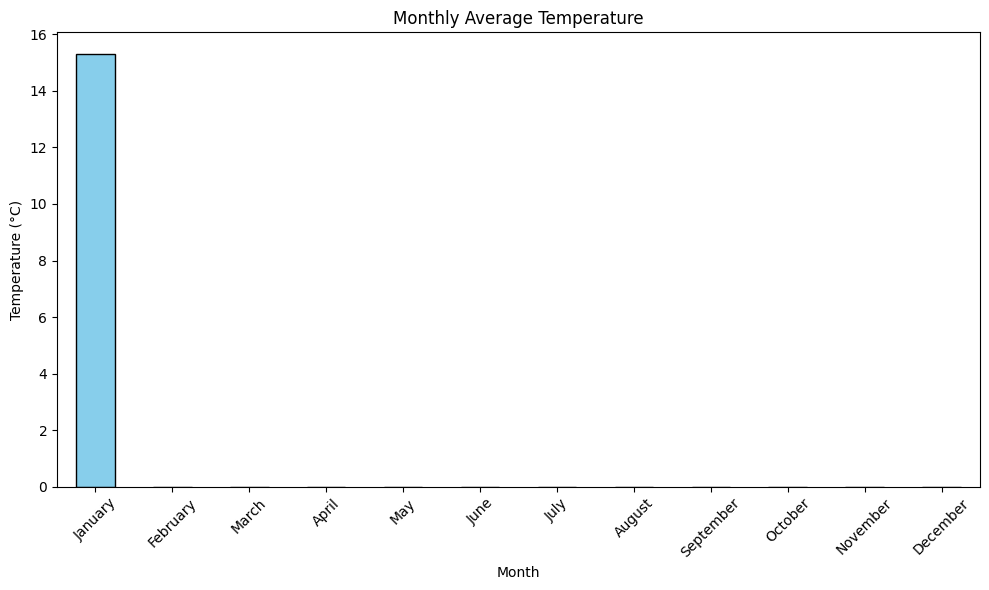

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Date': ['01-01-2025', '02-01-2025', '03-01-2025', '04-01-2025', '05-01-2025',
             '06-01-2025', '07-01-2025', '08-01-2025', '09-01-2025', '10-01-2025'],
    'Temperature (°C)': [15.2, 16.8, 14.5, 13, 17.6, 18.1, 16.2, 12.4, 13.8, 15.5],
    'Humidity (%)': [80, 75, 85, 90, 70, 65, 78, 88, 83, 79],
    'Wind Speed (km/h)': [10.5, 8, 12, 15.2, 7.4, 6, 9.1, 14.3, 11.5, 10],
    'Rainfall (mm)': [0, 0, 1.2, 5.4, 0, 0, 0.5, 2.1, 0, 0]
}

df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df.fillna(method='ffill', inplace=True)

df['Month'] = df['Date'].dt.month_name()

monthly_avg_temp = df.groupby('Month')['Temperature (°C)'].mean()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December']

monthly_avg_temp = monthly_avg_temp.reindex(months_order, fill_value=0)

print("Monthly Average Temperature:\n", monthly_avg_temp)

plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Monthly Average Temperature')
plt.ylabel('Temperature (°C)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd

data = {
    'Student ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Alice Brown', 'Ben Carter', 'Clara Davis', 'David Evans', 'Eva Foster',
             'Frank Green', 'Grace Hall', 'Henry Ives', 'Isla Jones', 'Jack King'],
    'Maths': [85, 78, 92, 65, 74, 60, 88, 70, 95, 82],
    'Physics': [88, 75, 94, 68, 78, 55, 85, 72, 96, 80],
    'Chemistry': [87, 80, 90, 66, 76, 58, 86, 74, 94, 78]
}

df = pd.DataFrame(data)

print("Summary statistics for each subject:")
print(df[['Maths', 'Physics', 'Chemistry']].describe())

df['Average Score'] = df[['Maths', 'Physics', 'Chemistry']].mean(axis=1)
print("\nAverage score for each student:")
print(df[['Student ID', 'Name', 'Average Score']])

below_60_count = ((df[['Maths', 'Physics', 'Chemistry']] < 60).sum(axis=1))
students_below_60 = df[below_60_count > 2]

print("\nStudents who scored below 60 in more than two subjects:")
print(students_below_60[['Student ID', 'Name', 'Maths', 'Physics', 'Chemistry']])

Summary statistics for each subject:
           Maths    Physics  Chemistry
count  10.000000  10.000000  10.000000
mean   78.900000  79.100000  78.900000
std    11.618472  12.449453  11.080012
min    60.000000  55.000000  58.000000
25%    71.000000  72.750000  74.500000
50%    80.000000  79.000000  79.000000
75%    87.250000  87.250000  86.750000
max    95.000000  96.000000  94.000000

Average score for each student:
   Student ID         Name  Average Score
0         101  Alice Brown      86.666667
1         102   Ben Carter      77.666667
2         103  Clara Davis      92.000000
3         104  David Evans      66.333333
4         105   Eva Foster      76.000000
5         106  Frank Green      57.666667
6         107   Grace Hall      86.333333
7         108   Henry Ives      72.000000
8         109   Isla Jones      95.000000
9         110    Jack King      80.000000

Students who scored below 60 in more than two subjects:
Empty DataFrame
Columns: [Student ID, Name, Maths, Physics, 

Summary statistics for departure delays:
count    10.000000
mean     18.000000
std      14.375906
min       0.000000
25%       6.250000
50%      17.500000
75%      28.750000
max      40.000000
Name: Departure Delay (minutes), dtype: float64

Average delay for each airline:
Airline
Airline A     7.500000
Airline B    18.333333
Airline C    31.666667
Name: Departure Delay (minutes), dtype: float64

Most common departure destination: LAX
Most common arrival destination: ORD


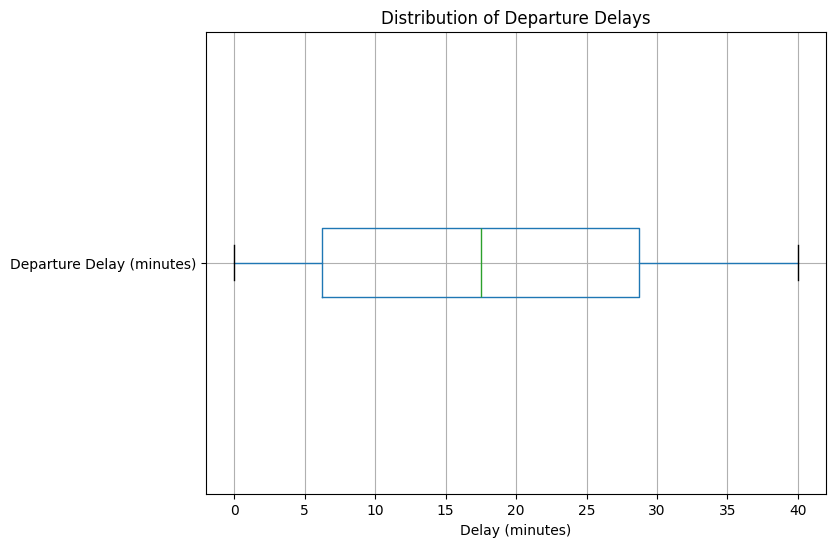

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'Flight ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Airline': ['Airline A', 'Airline B', 'Airline A', 'Airline C', 'Airline B',
                'Airline A', 'Airline C', 'Airline B', 'Airline A', 'Airline C'],
    'Origin': ['JFK', 'LAX', 'ORD', 'SFO', 'JFK', 'LAX', 'ORD', 'SFO', 'LAX', 'ORD'],
    'Destination': ['LAX', 'JFK', 'SFO', 'ORD', 'ORD', 'SFO', 'JFK', 'LAX', 'ORD', 'SFO'],
    'Departure Time': ['2025-04-01 08:00', '2025-04-01 09:30', '2025-04-01 10:00',
                       '2025-04-01 11:00', '2025-04-01 12:30', '2025-04-01 13:15',
                       '2025-04-01 14:00', '2025-04-01 15:00', '2025-04-01 16:30',
                       '2025-04-01 17:00'],
    'Departure Delay (minutes)': [10, 20, 5, 30, 0, 15, 25, 35, 0, 40]
}
df = pd.DataFrame(data)
print("Summary statistics for departure delays:")
print(df['Departure Delay (minutes)'].describe())
average_delay_airline = df.groupby('Airline')['Departure Delay (minutes)'].mean()
print("\nAverage delay for each airline:")
print(average_delay_airline)
most_common_origin = df['Origin'].mode()[0]
most_common_destination = df['Destination'].mode()[0]
print("\nMost common departure destination:", most_common_origin)
print("Most common arrival destination:", most_common_destination)
plt.figure(figsize=(8, 6))
df.boxplot(column='Departure Delay (minutes)', vert=False)
plt.title('Distribution of Departure Delays')
plt.xlabel('Delay (minutes)')
plt.show()

Basic Statistics for Temperature:
count    365.000000
mean      19.875155
std        9.903493
min       -7.725928
25%       13.105508
50%       19.474327
75%       26.663831
max       43.831448
Name: Temperature, dtype: float64


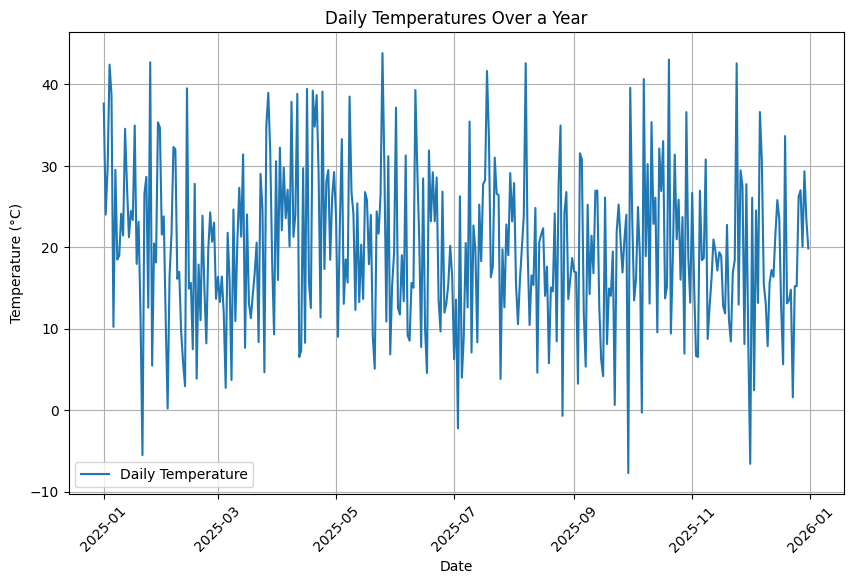

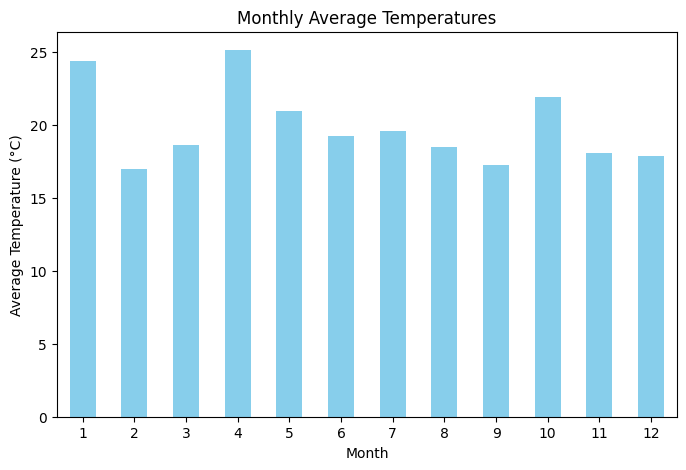

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)
dates = pd.date_range(start='2025-01-01', periods=365, freq='D')
temperatures = np.random.normal(loc=20, scale=10, size=365)
df = pd.DataFrame({
    'Date': dates,
    'Temperature': temperatures
})
print("Basic Statistics for Temperature:")
print(df['Temperature'].describe())
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Temperature'], label='Daily Temperature')
plt.title('Daily Temperatures Over a Year')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Temperature'].mean()
plt.figure(figsize=(8, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Monthly Average Temperatures')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.show()
max_temp = df['Temperature'].max()
min_temp = df['Temperature'].min()

Basic Statistics for Stock Prices:
count    365.000000
mean      99.750310
std       19.806986
min       44.548145
25%       86.211016
50%       98.948654
75%      113.327662
max      147.662895
Name: Stock Price, dtype: float64


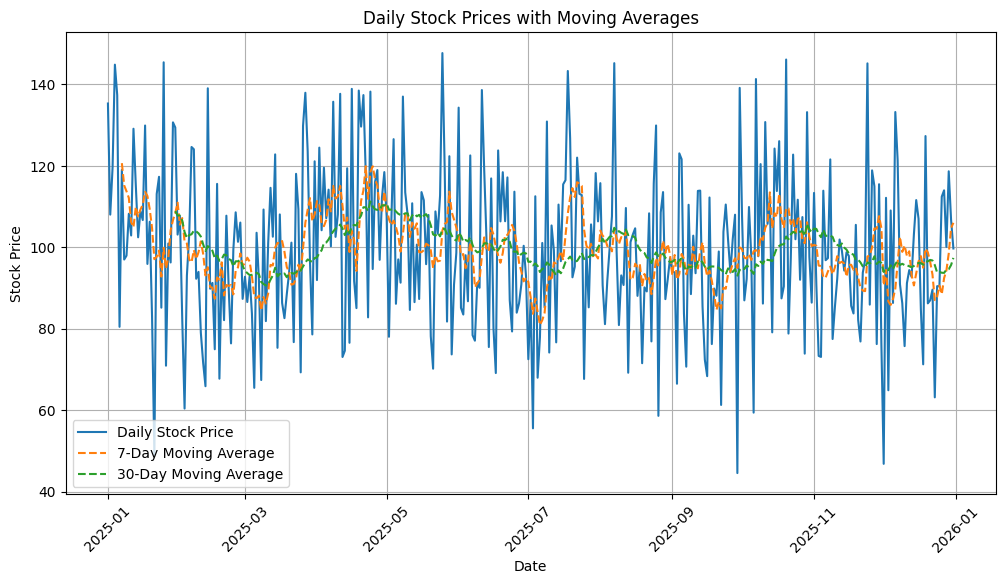

Highest Stock Price: 147.66289549727884 on 2025-05-25
Lowest Stock Price: 44.548144871466995 on 2025-09-29


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)
dates = pd.date_range(start='2025-01-01', periods=365, freq='D')
stock_prices = np.random.normal(loc=100, scale=20, size=365)

df = pd.DataFrame({
    'Date': dates,
    'Stock Price': stock_prices
})
print("Basic Statistics for Stock Prices:")
print(df['Stock Price'].describe())
df['7-Day Moving Average'] = df['Stock Price'].rolling(window=7).mean()
df['30-Day Moving Average'] = df['Stock Price'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Stock Price'], label='Daily Stock Price')
plt.plot(df['Date'], df['7-Day Moving Average'], label='7-Day Moving Average', linestyle='--')
plt.plot(df['Date'], df['30-Day Moving Average'], label='30-Day Moving Average', linestyle='--')
plt.title('Daily Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
highest_price = df['Stock Price'].max()
lowest_price = df['Stock Price'].min()
highest_price_date = df[df['Stock Price'] == highest_price]['Date'].iloc[0]
lowest_price_date = df[df['Stock Price'] == lowest_price]['Date'].iloc[0]
print(f"Highest Stock Price: {highest_price} on {highest_price_date.date()}")
print(f"Lowest Stock Price: {lowest_price} on {lowest_price_date.date()}")

In [6]:
import pandas as pd
data = ['Apple', 'Banana', 'Orange', 'Mango', 'Pineapple']
prices = [1.2, 0.5, 0.8, 1.5, 2.0]
fruits_df = pd.DataFrame(list(zip(data, prices)), columns=['Fruit', 'Price'])
print(fruits_df.info())
print(fruits_df.to_string())
print(fruits_df['Price'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fruit   5 non-null      object 
 1   Price   5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 212.0+ bytes
None
       Fruit  Price
0      Apple    1.2
1     Banana    0.5
2     Orange    0.8
3      Mango    1.5
4  Pineapple    2.0
count    5.000000
mean     1.200000
std      0.587367
min      0.500000
25%      0.800000
50%      1.200000
75%      1.500000
max      2.000000
Name: Price, dtype: float64
